# Problem Statement:
Build a decision tree prediction model to predict if the new visitor will transact or not.
When the new visitor visits the website, we get the information about source, medium, campaign,
deviceCategory, operatingSystem, city, channelGrouping, pageviews, timeOnSite, bounce, etc.

In [1]:
# Importing all the importantn libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset using the link
url = "https://storage.googleapis.com/sample_user_behavior_data/sample_user_data.csv"
sample_df = pd.read_csv(url)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data Exploration

In [3]:
sample_df.head()

fullVisitorId  VisitNumber      Date  VisitStartTime  bounces  \
0   785078151568671210            1  20170427      1493331229      1.0   
1   142102319075727733            1  20170427      1493316667      1.0   
2  1015855318272495035            1  20170427      1493295075      1.0   
3  7452646484470618802            1  20170427      1493299324      1.0   
4  1985244892543433393            3  20170427      1493309497      1.0   

   pageviews  timeOnSite  totalTransactionRevenue  transactions  source  \
0        1.0         NaN                      NaN           NaN  google   
1        1.0         NaN                      NaN           NaN  google   
2        1.0         NaN                      NaN           NaN  google   
3        1.0         NaN                      NaN           NaN  google   
4        1.0         NaN                      NaN           NaN  google   

    medium   campaign deviceCategory operatingSystem  \
0  organic  (not set)        desktop       Macintosh   
1  organic  (not set)        desktop       Macintosh   
2  organic  (not set)        desktop         Windows   
3  organic  (not set)        desktop         Windows   
4  organic  (not set)        desktop         Windows   

               mobileDeviceModel                           city  \
0  not available in demo dataset                  Mountain View   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset  not available in demo dataset   
3  not available in demo dataset  not available in demo dataset   
4  not available in demo dataset  not available in demo dataset   

  ChannelGrouping  
0  Organic Search  
1  Organic Search  
2  Organic Search  
3  Organic Search  
4  Organic Search

In [4]:
sample_df.describe()

VisitNumber          Date  VisitStartTime   bounces      pageviews  \
count  464439.000000  4.644390e+05    4.644390e+05  232178.0  464387.000000   
mean        2.334040  2.017042e+07    1.492485e+09       1.0       3.772011   
std         9.879354  2.006430e+02    5.279611e+06       0.0       6.403579   
min         1.000000  2.017010e+07    1.483258e+09       1.0       1.000000   
25%         1.000000  2.017022e+07    1.487899e+09       1.0       1.000000   
50%         1.000000  2.017042e+07    1.492441e+09       1.0       1.000000   
75%         1.000000  2.017061e+07    1.497075e+09       1.0       4.000000   
max       395.000000  2.017073e+07    1.501571e+09       1.0     466.000000   

          timeOnSite  totalTransactionRevenue  transactions  
count  231612.000000             6.308000e+03   6308.000000  
mean      279.921610             1.617053e+08      1.046449  
std       492.292307             9.034953e+08      0.531457  
min         1.000000             2.200000e+06      1.000000  
25%        33.000000             2.899000e+07      1.000000  
50%        94.000000             5.297500e+07      1.000000  
75%       290.000000             1.119375e+08      1.000000  
max     12136.000000             4.708206e+10     25.000000

In [5]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   fullVisitorId            464439 non-null  object 
 1   VisitNumber              464439 non-null  int64  
 2   Date                     464439 non-null  int64  
 3   VisitStartTime           464439 non-null  int64  
 4   bounces                  232178 non-null  float64
 5   pageviews                464387 non-null  float64
 6   timeOnSite               231612 non-null  float64
 7   totalTransactionRevenue  6308 non-null    float64
 8   transactions             6308 non-null    float64
 9   source                   464439 non-null  object 
 10  medium                   464439 non-null  object 
 11  campaign                 464439 non-null  object 
 12  deviceCategory           464439 non-null  object 
 13  operatingSystem          464439 non-null  object 
 14  mobi

In [6]:
sample_df.shape

(464439, 17)

## Pull out the full report of the dataset it will provide all the inofrmation related the data at one place
### Summary of the Data 
### Generate Report for the data
### Render HTML

In [7]:
import pandas_profiling as pp
pp.ProfileReport(sample_df)

In [8]:
# Make a copy of the original dataset for analysis purpose, so that the original dataset remains unchanged if required.
# Use copy() fucntion for this purpose
df = sample_df.copy()

In [9]:
df.head()

fullVisitorId  VisitNumber      Date  VisitStartTime  bounces  \
0   785078151568671210            1  20170427      1493331229      1.0   
1   142102319075727733            1  20170427      1493316667      1.0   
2  1015855318272495035            1  20170427      1493295075      1.0   
3  7452646484470618802            1  20170427      1493299324      1.0   
4  1985244892543433393            3  20170427      1493309497      1.0   

   pageviews  timeOnSite  totalTransactionRevenue  transactions  source  \
0        1.0         NaN                      NaN           NaN  google   
1        1.0         NaN                      NaN           NaN  google   
2        1.0         NaN                      NaN           NaN  google   
3        1.0         NaN                      NaN           NaN  google   
4        1.0         NaN                      NaN           NaN  google   

    medium   campaign deviceCategory operatingSystem  \
0  organic  (not set)        desktop       Macintosh   
1  organic  (not set)        desktop       Macintosh   
2  organic  (not set)        desktop         Windows   
3  organic  (not set)        desktop         Windows   
4  organic  (not set)        desktop         Windows   

               mobileDeviceModel                           city  \
0  not available in demo dataset                  Mountain View   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset  not available in demo dataset   
3  not available in demo dataset  not available in demo dataset   
4  not available in demo dataset  not available in demo dataset   

  ChannelGrouping  
0  Organic Search  
1  Organic Search  
2  Organic Search  
3  Organic Search  
4  Organic Search

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   fullVisitorId            464439 non-null  object 
 1   VisitNumber              464439 non-null  int64  
 2   Date                     464439 non-null  int64  
 3   VisitStartTime           464439 non-null  int64  
 4   bounces                  232178 non-null  float64
 5   pageviews                464387 non-null  float64
 6   timeOnSite               231612 non-null  float64
 7   totalTransactionRevenue  6308 non-null    float64
 8   transactions             6308 non-null    float64
 9   source                   464439 non-null  object 
 10  medium                   464439 non-null  object 
 11  campaign                 464439 non-null  object 
 12  deviceCategory           464439 non-null  object 
 13  operatingSystem          464439 non-null  object 
 14  mobi

## Data Cleaning

We will load the data, then trim and clean our datasets for analysis in this section.

Gte the list of the column names and their data types.

In [11]:
list(df.columns.values)

['fullVisitorId',
 'VisitNumber',
 'Date',
 'VisitStartTime',
 'bounces',
 'pageviews',
 'timeOnSite',
 'totalTransactionRevenue',
 'transactions',
 'source',
 'medium',
 'campaign',
 'deviceCategory',
 'operatingSystem',
 'mobileDeviceModel',
 'city',
 'ChannelGrouping']

### Column 1: fullVisitorId -This is a unique identifier for each user of Google Merchandise Store. 
### As the Visitor ID Information does not impact our analysis so, can remove this column

In [12]:
df = df.drop('fullVisitorId', axis=1)
df.head()

VisitNumber      Date  VisitStartTime  bounces  pageviews  timeOnSite  \
0            1  20170427      1493331229      1.0        1.0         NaN   
1            1  20170427      1493316667      1.0        1.0         NaN   
2            1  20170427      1493295075      1.0        1.0         NaN   
3            1  20170427      1493299324      1.0        1.0         NaN   
4            3  20170427      1493309497      1.0        1.0         NaN   

   totalTransactionRevenue  transactions  source   medium   campaign  \
0                      NaN           NaN  google  organic  (not set)   
1                      NaN           NaN  google  organic  (not set)   
2                      NaN           NaN  google  organic  (not set)   
3                      NaN           NaN  google  organic  (not set)   
4                      NaN           NaN  google  organic  (not set)   

  deviceCategory operatingSystem              mobileDeviceModel  \
0        desktop       Macintosh  not available in demo dataset   
1        desktop       Macintosh  not available in demo dataset   
2        desktop         Windows  not available in demo dataset   
3        desktop         Windows  not available in demo dataset   
4        desktop         Windows  not available in demo dataset   

                            city ChannelGrouping  
0                  Mountain View  Organic Search  
1  not available in demo dataset  Organic Search  
2  not available in demo dataset  Organic Search  
3  not available in demo dataset  Organic Search  
4  not available in demo dataset  Organic Search

#### Column 2: visitNumber -The session(visit) number for this user. If this is the first session, then this is set to 1. No change is required for this column in the dataset

In [13]:
df['VisitNumber'].value_counts()

1      353256
2       51792
3       19760
4       10573
5        6417
        ...  
307         1
364         1
363         1
362         1
353         1
Name: VisitNumber, Length: 383, dtype: int64

#### Column 3: date- The date of the session in YYYYMMDD format. The date info again is repeated in the next column (timestamp), hence the date info is duplicated and this column can be dropped. We will extract and analyse date info in the next column.

In [14]:
df = df.drop('Date', axis=1)
df.head()

VisitNumber  VisitStartTime  bounces  pageviews  timeOnSite  \
0            1      1493331229      1.0        1.0         NaN   
1            1      1493316667      1.0        1.0         NaN   
2            1      1493295075      1.0        1.0         NaN   
3            1      1493299324      1.0        1.0         NaN   
4            3      1493309497      1.0        1.0         NaN   

   totalTransactionRevenue  transactions  source   medium   campaign  \
0                      NaN           NaN  google  organic  (not set)   
1                      NaN           NaN  google  organic  (not set)   
2                      NaN           NaN  google  organic  (not set)   
3                      NaN           NaN  google  organic  (not set)   
4                      NaN           NaN  google  organic  (not set)   

  deviceCategory operatingSystem              mobileDeviceModel  \
0        desktop       Macintosh  not available in demo dataset   
1        desktop       Macintosh  not available in demo dataset   
2        desktop         Windows  not available in demo dataset   
3        desktop         Windows  not available in demo dataset   
4        desktop         Windows  not available in demo dataset   

                            city ChannelGrouping  
0                  Mountain View  Organic Search  
1  not available in demo dataset  Organic Search  
2  not available in demo dataset  Organic Search  
3  not available in demo dataset  Organic Search  
4  not available in demo dataset  Organic Search

#### Column 4: VisitStartTime - The timestamp (expressed as POSIX time). We extract Time from visitStartTime timestamp

In [15]:
from datetime import datetime
df["VisitStartTime"]=pd.to_datetime(df['VisitStartTime'],unit='s')
df.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         NaN   
1            1 2017-04-27 18:11:07      1.0        1.0         NaN   
2            1 2017-04-27 12:11:15      1.0        1.0         NaN   
3            1 2017-04-27 13:22:04      1.0        1.0         NaN   
4            3 2017-04-27 16:11:37      1.0        1.0         NaN   

   totalTransactionRevenue  transactions  source   medium   campaign  \
0                      NaN           NaN  google  organic  (not set)   
1                      NaN           NaN  google  organic  (not set)   
2                      NaN           NaN  google  organic  (not set)   
3                      NaN           NaN  google  organic  (not set)   
4                      NaN           NaN  google  organic  (not set)   

  deviceCategory operatingSystem              mobileDeviceModel  \
0        desktop       Macintosh  not available in demo dataset   
1        desktop       Macintosh  not available in demo dataset   
2        desktop         Windows  not available in demo dataset   
3        desktop         Windows  not available in demo dataset   
4        desktop         Windows  not available in demo dataset   

                            city ChannelGrouping  
0                  Mountain View  Organic Search  
1  not available in demo dataset  Organic Search  
2  not available in demo dataset  Organic Search  
3  not available in demo dataset  Organic Search  
4  not available in demo dataset  Organic Search

In [16]:
#Getting year, month and day from date
df['year']=df['VisitStartTime'].dt.year
df['month']=df['VisitStartTime'].dt.month
df['day']=df['VisitStartTime'].dt.day
df.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         NaN   
1            1 2017-04-27 18:11:07      1.0        1.0         NaN   
2            1 2017-04-27 12:11:15      1.0        1.0         NaN   
3            1 2017-04-27 13:22:04      1.0        1.0         NaN   
4            3 2017-04-27 16:11:37      1.0        1.0         NaN   

   totalTransactionRevenue  transactions  source   medium   campaign  \
0                      NaN           NaN  google  organic  (not set)   
1                      NaN           NaN  google  organic  (not set)   
2                      NaN           NaN  google  organic  (not set)   
3                      NaN           NaN  google  organic  (not set)   
4                      NaN           NaN  google  organic  (not set)   

  deviceCategory operatingSystem              mobileDeviceModel  \
0        desktop       Macintosh  not available in demo dataset   
1        desktop       Macintosh  not available in demo dataset   
2        desktop         Windows  not available in demo dataset   
3        desktop         Windows  not available in demo dataset   
4        desktop         Windows  not available in demo dataset   

                            city ChannelGrouping  year  month  day  
0                  Mountain View  Organic Search  2017      4   27  
1  not available in demo dataset  Organic Search  2017      4   27  
2  not available in demo dataset  Organic Search  2017      4   27  
3  not available in demo dataset  Organic Search  2017      4   27  
4  not available in demo dataset  Organic Search  2017      4   27

In [17]:
#Getting hour and minute from visitStartTime
df['hour']=df['VisitStartTime'].dt.hour
df['minute']=df['VisitStartTime'].dt.minute
df.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         NaN   
1            1 2017-04-27 18:11:07      1.0        1.0         NaN   
2            1 2017-04-27 12:11:15      1.0        1.0         NaN   
3            1 2017-04-27 13:22:04      1.0        1.0         NaN   
4            3 2017-04-27 16:11:37      1.0        1.0         NaN   

   totalTransactionRevenue  transactions  source   medium   campaign  \
0                      NaN           NaN  google  organic  (not set)   
1                      NaN           NaN  google  organic  (not set)   
2                      NaN           NaN  google  organic  (not set)   
3                      NaN           NaN  google  organic  (not set)   
4                      NaN           NaN  google  organic  (not set)   

  deviceCategory operatingSystem              mobileDeviceModel  \
0        desktop       Macintosh  not available in demo dataset   
1        desktop       Macintosh  not available in demo dataset   
2        desktop         Windows  not available in demo dataset   
3        desktop         Windows  not available in demo dataset   
4        desktop         Windows  not available in demo dataset   

                            city ChannelGrouping  year  month  day  hour  \
0                  Mountain View  Organic Search  2017      4   27    22   
1  not available in demo dataset  Organic Search  2017      4   27    18   
2  not available in demo dataset  Organic Search  2017      4   27    12   
3  not available in demo dataset  Organic Search  2017      4   27    13   
4  not available in demo dataset  Organic Search  2017      4   27    16   

   minute  
0      13  
1      11  
2      11  
3      22  
4      11

#### Column 5: totals_bounces - For a bounced session, the value is 1, otherwise it is null.
#### If a user has bounced off (total_bounces =1) there will be no transaction. Hence when total_bounce = 0 or NA will be accounted into those with successful transactions. We replace all NaN values in this column with 0.

In [18]:
df['bounces'].value_counts()

1.0    232178
Name: bounces, dtype: int64

In [19]:
df['bounces'].fillna(0,inplace=True)
df.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         NaN   
1            1 2017-04-27 18:11:07      1.0        1.0         NaN   
2            1 2017-04-27 12:11:15      1.0        1.0         NaN   
3            1 2017-04-27 13:22:04      1.0        1.0         NaN   
4            3 2017-04-27 16:11:37      1.0        1.0         NaN   

   totalTransactionRevenue  transactions  source   medium   campaign  \
0                      NaN           NaN  google  organic  (not set)   
1                      NaN           NaN  google  organic  (not set)   
2                      NaN           NaN  google  organic  (not set)   
3                      NaN           NaN  google  organic  (not set)   
4                      NaN           NaN  google  organic  (not set)   

  deviceCategory operatingSystem              mobileDeviceModel  \
0        desktop       Macintosh  not available in demo dataset   
1        desktop       Macintosh  not available in demo dataset   
2        desktop         Windows  not available in demo dataset   
3        desktop         Windows  not available in demo dataset   
4        desktop         Windows  not available in demo dataset   

                            city ChannelGrouping  year  month  day  hour  \
0                  Mountain View  Organic Search  2017      4   27    22   
1  not available in demo dataset  Organic Search  2017      4   27    18   
2  not available in demo dataset  Organic Search  2017      4   27    12   
3  not available in demo dataset  Organic Search  2017      4   27    13   
4  not available in demo dataset  Organic Search  2017      4   27    16   

   minute  
0      13  
1      11  
2      11  
3      22  
4      11

#### Column 6: pageviews-Total number of pageviews within the session.
#### If a user has no page views,there will be no transaction. Hence we replace the NaN values in this column with 0.

In [20]:
df['pageviews'].fillna(0,inplace=True)
df.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         NaN   
1            1 2017-04-27 18:11:07      1.0        1.0         NaN   
2            1 2017-04-27 12:11:15      1.0        1.0         NaN   
3            1 2017-04-27 13:22:04      1.0        1.0         NaN   
4            3 2017-04-27 16:11:37      1.0        1.0         NaN   

   totalTransactionRevenue  transactions  source   medium   campaign  \
0                      NaN           NaN  google  organic  (not set)   
1                      NaN           NaN  google  organic  (not set)   
2                      NaN           NaN  google  organic  (not set)   
3                      NaN           NaN  google  organic  (not set)   
4                      NaN           NaN  google  organic  (not set)   

  deviceCategory operatingSystem              mobileDeviceModel  \
0        desktop       Macintosh  not available in demo dataset   
1        desktop       Macintosh  not available in demo dataset   
2        desktop         Windows  not available in demo dataset   
3        desktop         Windows  not available in demo dataset   
4        desktop         Windows  not available in demo dataset   

                            city ChannelGrouping  year  month  day  hour  \
0                  Mountain View  Organic Search  2017      4   27    22   
1  not available in demo dataset  Organic Search  2017      4   27    18   
2  not available in demo dataset  Organic Search  2017      4   27    12   
3  not available in demo dataset  Organic Search  2017      4   27    13   
4  not available in demo dataset  Organic Search  2017      4   27    16   

   minute  
0      13  
1      11  
2      11  
3      22  
4      11

#### Column 7: timeOnSite  -Total time of the session expressed in seconds. 
#### In practical situation, if a user has no total time on site,there will be no transaction. Hence we replace the NaN values in this column with 0

In [21]:
df['timeOnSite'].fillna(0,inplace=True)
df.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         0.0   
1            1 2017-04-27 18:11:07      1.0        1.0         0.0   
2            1 2017-04-27 12:11:15      1.0        1.0         0.0   
3            1 2017-04-27 13:22:04      1.0        1.0         0.0   
4            3 2017-04-27 16:11:37      1.0        1.0         0.0   

   totalTransactionRevenue  transactions  source   medium   campaign  \
0                      NaN           NaN  google  organic  (not set)   
1                      NaN           NaN  google  organic  (not set)   
2                      NaN           NaN  google  organic  (not set)   
3                      NaN           NaN  google  organic  (not set)   
4                      NaN           NaN  google  organic  (not set)   

  deviceCategory operatingSystem              mobileDeviceModel  \
0        desktop       Macintosh  not available in demo dataset   
1        desktop       Macintosh  not available in demo dataset   
2        desktop         Windows  not available in demo dataset   
3        desktop         Windows  not available in demo dataset   
4        desktop         Windows  not available in demo dataset   

                            city ChannelGrouping  year  month  day  hour  \
0                  Mountain View  Organic Search  2017      4   27    22   
1  not available in demo dataset  Organic Search  2017      4   27    18   
2  not available in demo dataset  Organic Search  2017      4   27    12   
3  not available in demo dataset  Organic Search  2017      4   27    13   
4  not available in demo dataset  Organic Search  2017      4   27    16   

   minute  
0      13  
1      11  
2      11  
3      22  
4      11

#### Column 8: totalTransactionRevenue- Total transaction revenue, expressed as the value passed to Analytics multiplied by 10^6. 
#### Here we note that 'totalTransactionRevenue' and 'totals_transactions' are related columns. If 'totals_transactions' has null value, then the corresponding  'totalTransactionRevenue' column should also have a null value, and vice-versa.


#### We therefore check these two columns for the following conditions:

1. If there are any 'transactions' null values where the corresponding  'totalTransactionRevenue' value is not null.

2. If there are any 'totalTransactionRevenue' null values where the corresponding  'transactions' value is not null.

In [22]:
df['diff'] = df.totalTransactionRevenue.eq(pd.to_numeric(df.transactions, errors='coerce'))

In [23]:
df['diff'].value_counts()

False    464439
Name: diff, dtype: int64

#### If a user has no transaction revenue, there will be no transaction. We replace all NaN values in this column with 0

In [24]:
df['totalTransactionRevenue'].value_counts()

23990000.0    49
22990000.0    48
25990000.0    46
21990000.0    44
24990000.0    41
              ..
24720000.0     1
98870000.0     1
61790000.0     1
98830000.0     1
24150000.0     1
Name: totalTransactionRevenue, Length: 3695, dtype: int64

In [25]:
df['totalTransactionRevenue'].fillna(0,inplace=True)
df.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         0.0   
1            1 2017-04-27 18:11:07      1.0        1.0         0.0   
2            1 2017-04-27 12:11:15      1.0        1.0         0.0   
3            1 2017-04-27 13:22:04      1.0        1.0         0.0   
4            3 2017-04-27 16:11:37      1.0        1.0         0.0   

   totalTransactionRevenue  transactions  source   medium   campaign  ...  \
0                      0.0           NaN  google  organic  (not set)  ...   
1                      0.0           NaN  google  organic  (not set)  ...   
2                      0.0           NaN  google  organic  (not set)  ...   
3                      0.0           NaN  google  organic  (not set)  ...   
4                      0.0           NaN  google  organic  (not set)  ...   

  operatingSystem              mobileDeviceModel  \
0       Macintosh  not available in demo dataset   
1       Macintosh  not available in demo dataset   
2         Windows  not available in demo dataset   
3         Windows  not available in demo dataset   
4         Windows  not available in demo dataset   

                            city ChannelGrouping  year  month  day  hour  \
0                  Mountain View  Organic Search  2017      4   27    22   
1  not available in demo dataset  Organic Search  2017      4   27    18   
2  not available in demo dataset  Organic Search  2017      4   27    12   
3  not available in demo dataset  Organic Search  2017      4   27    13   
4  not available in demo dataset  Organic Search  2017      4   27    16   

   minute   diff  
0      13  False  
1      11  False  
2      11  False  
3      22  False  
4      11  False  

[5 rows x 21 columns]

#### Column 9: transactions: Total number of ecommerce transactions within the session. 
#### The missing values for transactions in our dataset which we can consider as 0 (no transaction), hence we replace all NaN values in this column with 0 .

In [26]:
df['transactions'].fillna(0,inplace=True)
df.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         0.0   
1            1 2017-04-27 18:11:07      1.0        1.0         0.0   
2            1 2017-04-27 12:11:15      1.0        1.0         0.0   
3            1 2017-04-27 13:22:04      1.0        1.0         0.0   
4            3 2017-04-27 16:11:37      1.0        1.0         0.0   

   totalTransactionRevenue  transactions  source   medium   campaign  ...  \
0                      0.0           0.0  google  organic  (not set)  ...   
1                      0.0           0.0  google  organic  (not set)  ...   
2                      0.0           0.0  google  organic  (not set)  ...   
3                      0.0           0.0  google  organic  (not set)  ...   
4                      0.0           0.0  google  organic  (not set)  ...   

  operatingSystem              mobileDeviceModel  \
0       Macintosh  not available in demo dataset   
1       Macintosh  not available in demo dataset   
2         Windows  not available in demo dataset   
3         Windows  not available in demo dataset   
4         Windows  not available in demo dataset   

                            city ChannelGrouping  year  month  day  hour  \
0                  Mountain View  Organic Search  2017      4   27    22   
1  not available in demo dataset  Organic Search  2017      4   27    18   
2  not available in demo dataset  Organic Search  2017      4   27    12   
3  not available in demo dataset  Organic Search  2017      4   27    13   
4  not available in demo dataset  Organic Search  2017      4   27    16   

   minute   diff  
0      13  False  
1      11  False  
2      11  False  
3      22  False  
4      11  False  

[5 rows x 21 columns]

#### Column 10- source: The source of the traffic source. Could be the name of the search engine, the referring hostname, or a value of the utm_source URL parameter.

In [27]:
df['source'].value_counts()

(direct)                187241
google                  179591
youtube.com              50205
analytics.google.com     10859
Partners                  9715
                         ...  
earth.google.com             1
search.snapdo.com            1
so.com                       1
ps-dm.reddit.com             1
yahoo.com                    1
Name: source, Length: 223, dtype: int64

#### Column 11 - medium: The medium of the traffic source. Could be "organic", "cpc", "referral", or the value of the utm_medium URL parameter.

In [28]:
df['medium'].value_counts()

(none)       187239
organic      173206
referral      81701
affiliate      9708
cpc            9262
cpm            3211
(not set)       112
Name: medium, dtype: int64

#### Column 12- campaign: The campaign value. Usually set by the utm_campaign URL parameter

In [29]:
df['campaign'].value_counts()

(not set)                             446332
Data Share Promo                        9708
AW - Accessories                        5318
AW - Dynamic Search Ads Whole Site      3045
AW - Apparel                              32
AW - Electronics                           3
Data Share                                 1
Name: campaign, dtype: int64

#### Column 13- deviceCategory: The type of device (Mobile, Tablet, Desktop).

In [30]:
df['deviceCategory'].value_counts()

desktop    312851
mobile     133180
tablet      18408
Name: deviceCategory, dtype: int64

#### Column 14- operatingSystem: The operating system of the device (e.g., "Macintosh" or "Windows").

In [31]:
df['operatingSystem'].value_counts()

Windows          171189
Macintosh        107280
Android           78213
iOS               69077
Linux             19343
Chrome OS         15474
(not set)          2797
Windows Phone       623
Samsung             186
BlackBerry          112
Nintendo WiiU        35
Xbox                 34
Nintendo Wii         33
Firefox OS           32
FreeBSD               7
OpenBSD               2
Nintendo 3DS          1
NTT DoCoMo            1
Name: operatingSystem, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VisitNumber              464439 non-null  int64         
 1   VisitStartTime           464439 non-null  datetime64[ns]
 2   bounces                  464439 non-null  float64       
 3   pageviews                464439 non-null  float64       
 4   timeOnSite               464439 non-null  float64       
 5   totalTransactionRevenue  464439 non-null  float64       
 6   transactions             464439 non-null  float64       
 7   source                   464439 non-null  object        
 8   medium                   464439 non-null  object        
 9   campaign                 464439 non-null  object        
 10  deviceCategory           464439 non-null  object        
 11  operatingSystem          464439 non-null  object        
 12  mobileDeviceMode

In [33]:
#### Column 15- mobileDeviceModel: The mobile device model.

In [34]:
df['mobileDeviceModel'].value_counts()

not available in demo dataset    464439
Name: mobileDeviceModel, dtype: int64

In [35]:
# There are no values in this column are not available, hence we can drop this column from our dataset.
df = df.drop('mobileDeviceModel', axis=1)
df.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         0.0   
1            1 2017-04-27 18:11:07      1.0        1.0         0.0   
2            1 2017-04-27 12:11:15      1.0        1.0         0.0   
3            1 2017-04-27 13:22:04      1.0        1.0         0.0   
4            3 2017-04-27 16:11:37      1.0        1.0         0.0   

   totalTransactionRevenue  transactions  source   medium   campaign  \
0                      0.0           0.0  google  organic  (not set)   
1                      0.0           0.0  google  organic  (not set)   
2                      0.0           0.0  google  organic  (not set)   
3                      0.0           0.0  google  organic  (not set)   
4                      0.0           0.0  google  organic  (not set)   

  deviceCategory operatingSystem                           city  \
0        desktop       Macintosh                  Mountain View   
1        desktop       Macintosh  not available in demo dataset   
2        desktop         Windows  not available in demo dataset   
3        desktop         Windows  not available in demo dataset   
4        desktop         Windows  not available in demo dataset   

  ChannelGrouping  year  month  day  hour  minute   diff  
0  Organic Search  2017      4   27    22      13  False  
1  Organic Search  2017      4   27    18      11  False  
2  Organic Search  2017      4   27    12      11  False  
3  Organic Search  2017      4   27    13      22  False  
4  Organic Search  2017      4   27    16      11  False

#### Column 16 - city: Users' city, derived from their IP addresses or Geographical IDs.

In [36]:
df['city'].value_counts()

not available in demo dataset    268179
Mountain View                     21560
(not set)                         16313
New York                          14582
San Francisco                     11455
                                  ...  
Kumamoto                              5
Saratoga                              3
Bozeman                               3
Boise                                 3
Pryor                                 3
Name: city, Length: 436, dtype: int64

In [37]:
# format and replace the values
df['city'].replace('not available in demo dataset', 'NotKnown',inplace=True)
df['city'].replace('(not set)', 'NotKnown',inplace=True)
df.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         0.0   
1            1 2017-04-27 18:11:07      1.0        1.0         0.0   
2            1 2017-04-27 12:11:15      1.0        1.0         0.0   
3            1 2017-04-27 13:22:04      1.0        1.0         0.0   
4            3 2017-04-27 16:11:37      1.0        1.0         0.0   

   totalTransactionRevenue  transactions  source   medium   campaign  \
0                      0.0           0.0  google  organic  (not set)   
1                      0.0           0.0  google  organic  (not set)   
2                      0.0           0.0  google  organic  (not set)   
3                      0.0           0.0  google  organic  (not set)   
4                      0.0           0.0  google  organic  (not set)   

  deviceCategory operatingSystem           city ChannelGrouping  year  month  \
0        desktop       Macintosh  Mountain View  Organic Search  2017      4   
1        desktop       Macintosh       NotKnown  Organic Search  2017      4   
2        desktop         Windows       NotKnown  Organic Search  2017      4   
3        desktop         Windows       NotKnown  Organic Search  2017      4   
4        desktop         Windows       NotKnown  Organic Search  2017      4   

   day  hour  minute   diff  
0   27    22      13  False  
1   27    18      11  False  
2   27    12      11  False  
3   27    13      22  False  
4   27    16      11  False

#### Column 17: ChannelGrouping: The Default Channel Group associated with an end user's session for this View

In [38]:
df['ChannelGrouping'].value_counts()

Organic Search    232876
Direct             85993
Social             59915
Referral           58390
Paid Search        14177
Affiliates          9708
Display             3265
(Other)              114
Organic S              1
Name: ChannelGrouping, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VisitNumber              464439 non-null  int64         
 1   VisitStartTime           464439 non-null  datetime64[ns]
 2   bounces                  464439 non-null  float64       
 3   pageviews                464439 non-null  float64       
 4   timeOnSite               464439 non-null  float64       
 5   totalTransactionRevenue  464439 non-null  float64       
 6   transactions             464439 non-null  float64       
 7   source                   464439 non-null  object        
 8   medium                   464439 non-null  object        
 9   campaign                 464439 non-null  object        
 10  deviceCategory           464439 non-null  object        
 11  operatingSystem          464439 non-null  object        
 12  city            

#### As we have to predict if the new visitor will transact or not. Now we will create a new target variable column- 'transact', which takes the value 1 for a transaction and 0 for no transaction.

In [40]:
df['transact'] = np.where(df['transactions']  == 0, '0','1')
df['transact'] = df['transact'].astype('str')

In [41]:
#totalTransactionRevenue- Total transaction revenue is expressed as the value passed to Analytics multiplied by 10^6
# Therefore , the TransactionRevenue is obtained as totalTransactionRevenue/ 1000000

df['TransactionRevenue'] = df['totalTransactionRevenue'] / 1000000

## Exploratory Data Analysis 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VisitNumber              464439 non-null  int64         
 1   VisitStartTime           464439 non-null  datetime64[ns]
 2   bounces                  464439 non-null  float64       
 3   pageviews                464439 non-null  float64       
 4   timeOnSite               464439 non-null  float64       
 5   totalTransactionRevenue  464439 non-null  float64       
 6   transactions             464439 non-null  float64       
 7   source                   464439 non-null  object        
 8   medium                   464439 non-null  object        
 9   campaign                 464439 non-null  object        
 10  deviceCategory           464439 non-null  object        
 11  operatingSystem          464439 non-null  object        
 12  city            

### Drop 
#### VisitStartTime: As we have extracted Year/month/day/hour/minute from this column
#### Year- as the data is of year2017 only so all the records are same
#### totaltransaction - We have extracted the required information from this column
#### diff - Not required anymore as information is already used for comparison 

In [43]:
df = df.drop(['VisitStartTime','totalTransactionRevenue','year','diff'],axis=1)

In [44]:
df.head()

VisitNumber  bounces  pageviews  timeOnSite  transactions  source   medium  \
0            1      1.0        1.0         0.0           0.0  google  organic   
1            1      1.0        1.0         0.0           0.0  google  organic   
2            1      1.0        1.0         0.0           0.0  google  organic   
3            1      1.0        1.0         0.0           0.0  google  organic   
4            3      1.0        1.0         0.0           0.0  google  organic   

    campaign deviceCategory operatingSystem           city ChannelGrouping  \
0  (not set)        desktop       Macintosh  Mountain View  Organic Search   
1  (not set)        desktop       Macintosh       NotKnown  Organic Search   
2  (not set)        desktop         Windows       NotKnown  Organic Search   
3  (not set)        desktop         Windows       NotKnown  Organic Search   
4  (not set)        desktop         Windows       NotKnown  Organic Search   

   month  day  hour  minute transact  TransactionRevenue  
0      4   27    22      13        0                 0.0  
1      4   27    18      11        0                 0.0  
2      4   27    12      11        0                 0.0  
3      4   27    13      22        0                 0.0  
4      4   27    16      11        0                 0.0

In [45]:
df.describe()

VisitNumber        bounces      pageviews     timeOnSite  \
count  464439.000000  464439.000000  464439.000000  464439.000000   
mean        2.334040       0.499911       3.771589     139.594659   
std         9.879354       0.500001       6.403345     374.763296   
min         1.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         1.000000       1.000000       4.000000      94.000000   
max       395.000000       1.000000     466.000000   12136.000000   

        transactions          month            day           hour  \
count  464439.000000  464439.000000  464439.000000  464439.000000   
mean        0.014213       4.051736      15.756078      12.663982   
std         0.136039       2.006265       8.798566       6.852292   
min         0.000000       1.000000       1.000000       0.000000   
25%         0.000000       2.000000       8.000000       7.000000   
50%         0.000000       4.000000      16.000000      14.000000   
75%         0.000000       6.000000      23.000000      18.000000   
max        25.000000       8.000000      31.000000      23.000000   

              minute  TransactionRevenue  
count  464439.000000       464439.000000  
mean       29.541287            2.196278  
std        17.282520          106.937428  
min         0.000000            0.000000  
25%        15.000000            0.000000  
50%        30.000000            0.000000  
75%        45.000000            0.000000  
max        59.000000        47082.060000

### Observation made on statistical summary & the dataset

1. User's mean numbuer of visit is 2 and around 75% have visited only once. Maximum visit are 395
2. Approx 50% on visits are bounces
3. The mean number of pageviews is near to 4 and around 75% of pageviews are close to 4. Outlier is a maximum value of 466 page view.
4. Average time spent by user on the site is 39 seconds. Minimum tome is 0(for bounces), maximum outliers values upto 12136 seconds
5. Average number of transactions per visit is quite low at 0.014213. More than 75% of vists do not result in transactions
6. avergae revenuue per transaction is 2 currency units, there is large value outlier as the maximum is 47082.
7. Trasact value 458131 visits have yielded no transactions

In [46]:
df['transact'].value_counts()

0    458131
1      6308
Name: transact, dtype: int64

**8. Transactions by month,date,hour**

In [47]:
base_colour = sns.color_palette()[0]

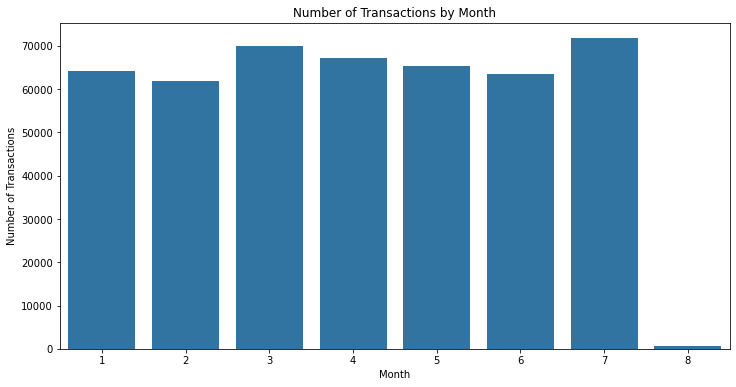

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=df, color=base_colour)
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Month");

Observation: Number of trasaction remain uniformly distributed throughout the year

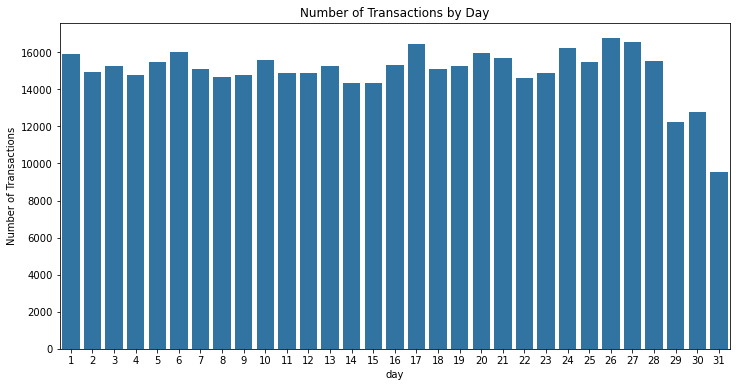

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x='day', data=df, color=base_colour)
plt.xlabel("day")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Day");

Observation: The number of transactions remains uniformly throughout the month, but decreases at the end of the month.

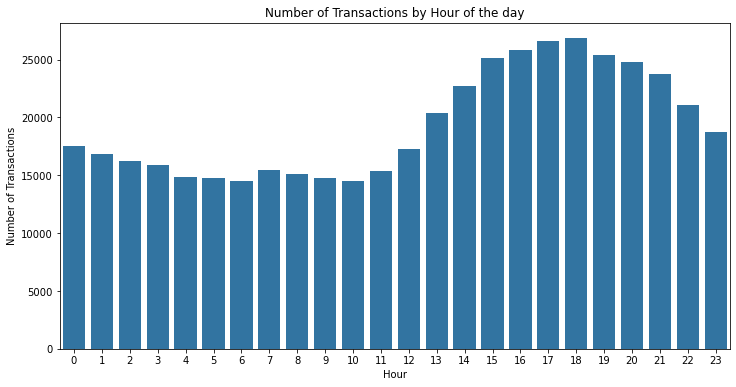

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=df, color=base_colour)
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Hour of the day");

Observation: The number of transactions remains less and approximately uniform in the morning hours, and starts increasing from around noon. It reaches a peak in the evening between 5-6 pm, and then starts decreasing again during late evening hours.

**9. Transactions by device category, device_operatingSystem, channelGrouping, medium**

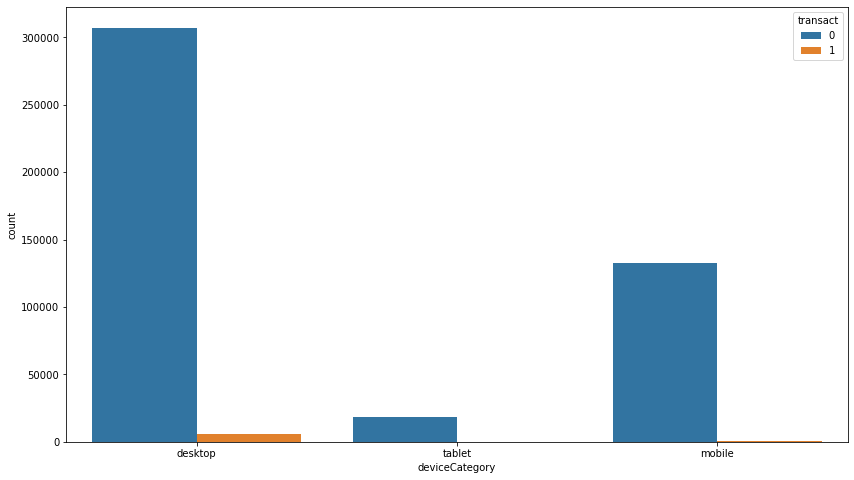

In [51]:
plt.figure(figsize=(14,8))
sns.countplot(x='deviceCategory', hue = 'transact', data=df);

Observation: Maximum number of transactions originate from desktop, and least from tablets.

#### 10. Trasaction by Different channel

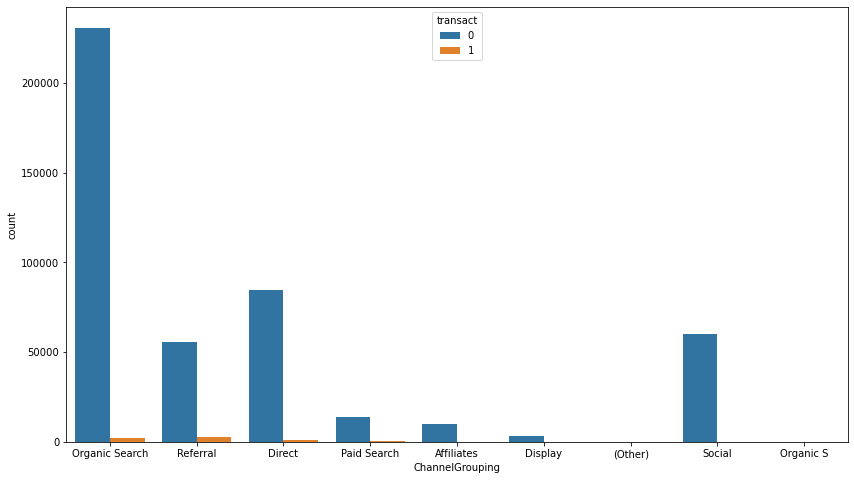

In [52]:
plt.figure(figsize=(14,8))
sns.countplot(x='ChannelGrouping', hue = 'transact', data=df);

Observation: Organic search, direct, social and referral lead to maximum transactions.

#### 11.  Use of operating system in trasaction

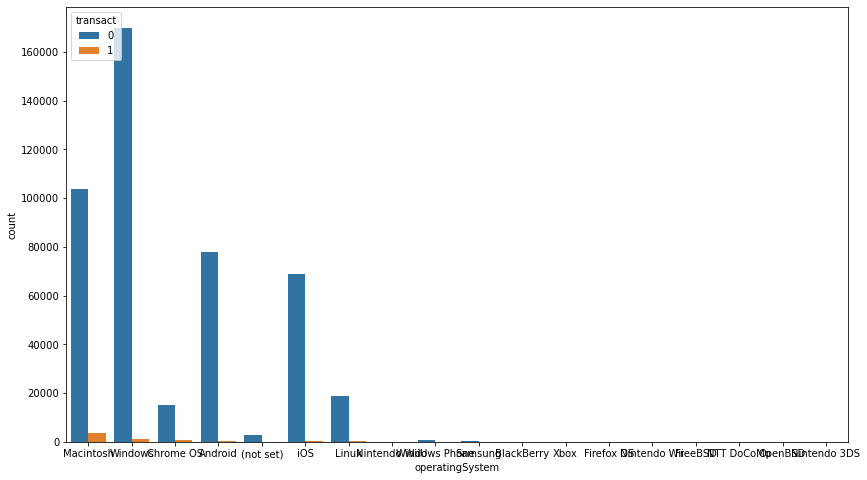

In [53]:
plt.figure(figsize=(14,8))
sns.countplot(x='operatingSystem', hue = 'transact', data=df);

Observation: Macintosh and windows users have a higher transaction.

#### 12. source of medium

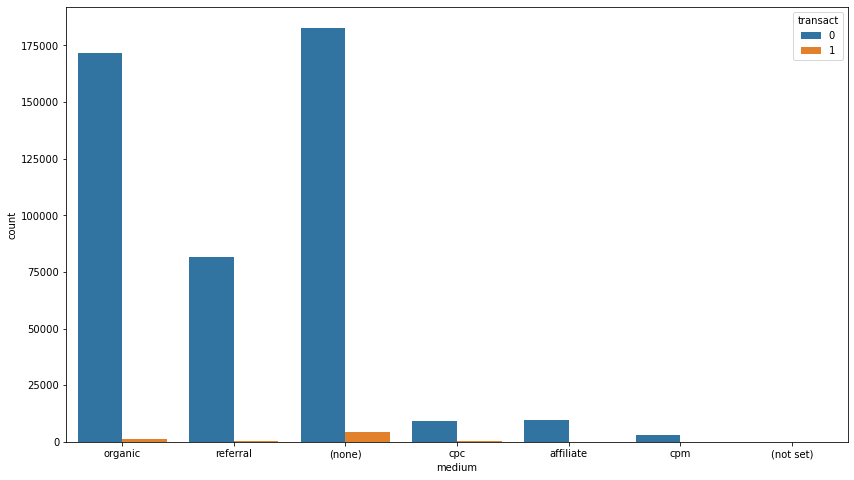

In [54]:
plt.figure(figsize=(14,8))
sns.countplot(x='medium', hue = 'transact', data=df);

Observation: Organic and (none) are the higher conversion mediums.

#### 13 Correlatison matrix will show the relationship between all the feature

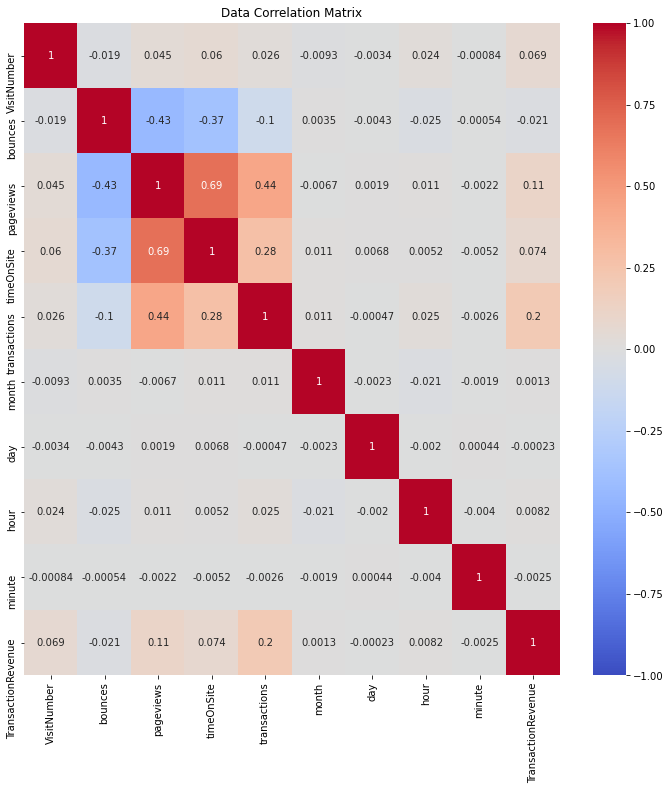

In [55]:
fig1 = plt.figure(figsize=(12,12));
df.corr()
plt.title('Data Correlation Matrix')
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True);

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   VisitNumber         464439 non-null  int64  
 1   bounces             464439 non-null  float64
 2   pageviews           464439 non-null  float64
 3   timeOnSite          464439 non-null  float64
 4   transactions        464439 non-null  float64
 5   source              464439 non-null  object 
 6   medium              464439 non-null  object 
 7   campaign            464439 non-null  object 
 8   deviceCategory      464439 non-null  object 
 9   operatingSystem     464439 non-null  object 
 10  city                464439 non-null  object 
 11  ChannelGrouping     464439 non-null  object 
 12  month               464439 non-null  int64  
 13  day                 464439 non-null  int64  
 14  hour                464439 non-null  int64  
 15  minute              464439 non-nul

#### In the Pandas dataframe, we encode all the data which are categorized to dtype: object. We categorize the object features in two different groups. The group having many categorical values will be used for Label Encoding and the other having only a few categorical values will be used for One Hot Encoding.

In [57]:
cat_many_label_cols = ["ChannelGrouping","city","operatingSystem", "campaign","medium", "source"]
cat_few_label_cols = ["deviceCategory"]

In [58]:
# Perform Label Encoding and One Hot Encoding for the above grouped features.
from sklearn import preprocessing
for col in cat_many_label_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df[col].values.astype('str')))
    df[col] = lbl.transform(list(df[col].values.astype('str')))
    
df = pd.get_dummies(df,columns=cat_few_label_cols)

ChannelGrouping
city
operatingSystem
campaign
medium
source


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   VisitNumber             464439 non-null  int64  
 1   bounces                 464439 non-null  float64
 2   pageviews               464439 non-null  float64
 3   timeOnSite              464439 non-null  float64
 4   transactions            464439 non-null  float64
 5   source                  464439 non-null  int64  
 6   medium                  464439 non-null  int64  
 7   campaign                464439 non-null  int64  
 8   operatingSystem         464439 non-null  int64  
 9   city                    464439 non-null  int64  
 10  ChannelGrouping         464439 non-null  int64  
 11  month                   464439 non-null  int64  
 12  day                     464439 non-null  int64  
 13  hour                    464439 non-null  int64  
 14  minute              

### Split dataset into features and target variable

In [60]:
feature_cols = ['VisitNumber',
               'bounces',
               'pageviews',
               'timeOnSite',
               'source',
               'medium',
               'campaign',
               'operatingSystem',
               'city',
               'ChannelGrouping',
               'month',
               'day',
               'hour',
               'deviceCategory_desktop',
               'deviceCategory_mobile']
# Features
X = df[feature_cols] 

# Target variable
y = df.transact 

In [61]:
X.shape

(464439, 15)

In [62]:
y.shape

(464439,)

### Split dataset into Test and Train sets

In [63]:
# Split the dataset into training set and test set. We put puts 70% of the data into a training set and 30% of the data into a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Building Decision Tree Model

In [64]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [65]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

###  Evaluating the Decision Tree Model

Evaluating Model- check how accurately the classifier or model can predict the type of cultivars.
Accuracy can be computed by comparing actual test set values and predicted values.


In [66]:
# we are going to use accuracy as our metric.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9804782820888238


In [67]:
# Alternative: The score method returns the accuracy of the model
score = clf.score(X_test, y_test)
print(score)

0.9804782820888238


Observation: We have been able to achieve an accuracy of approximately 98% using these features.

## Visualizing Decision Trees

In [68]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [72]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

In [ ]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\User\\Anaconda3\\Library\\bin\\graphviz'

We use export_graphviz function to convert the decision tree classifier into dot file, and pydotplus to convert this dot file to png or displayable form on Jupyter.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.176498 to fit



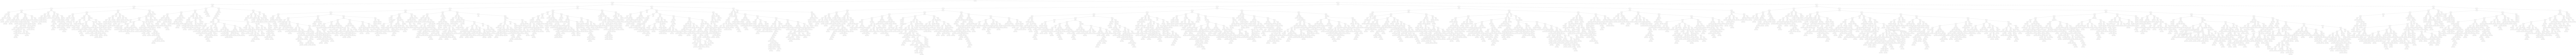

In [73]:
from IPython.display import Image
import graphviz
out = StringIO()
tree.export_graphviz(clf, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())

Image(graph.create_png())

### Optimizing Decision Tree Performance

#### In Scikit-learn, optimization of decision tree classifier is performed by only pre-pruning. We now plot a decision tree on the same data choosing max_depth=3. Other than pre-pruning parameters, we can also try other attribute selection measure such as entropy.

In [83]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9856888582665863


#### We observe that the accuracy of this model has increased over the previous model. We now visualize the new model.

In [88]:
from IPython.display import Image
out = StringIO()
tree.export_graphviz(clf, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())


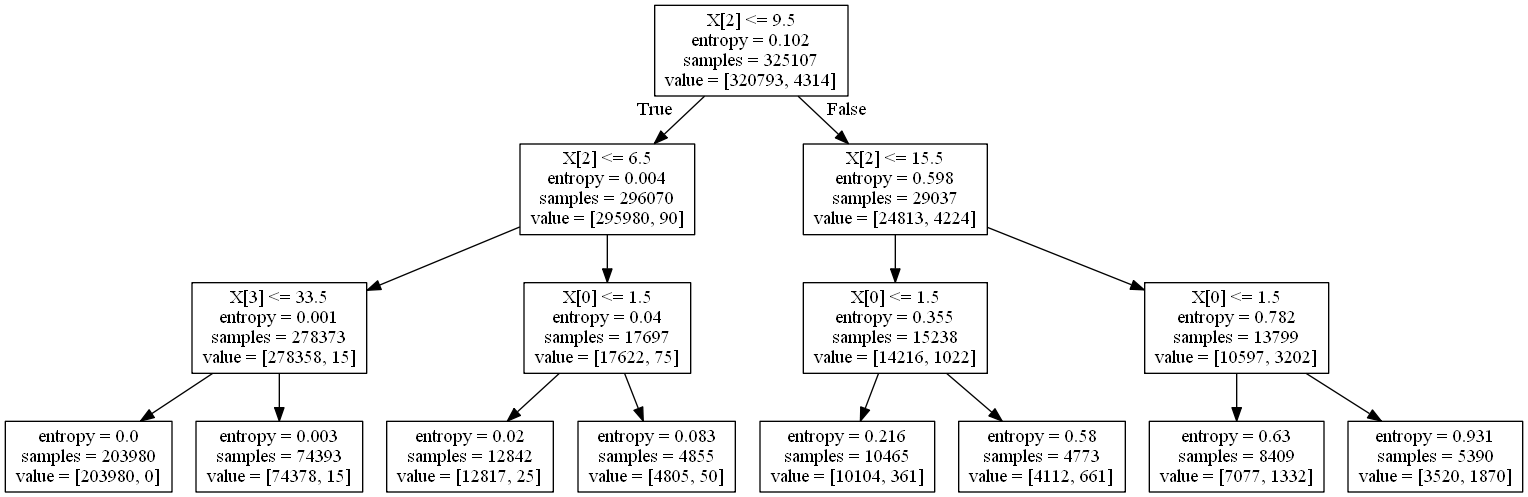

In [89]:
Image(graph.create_png())

#### This optimized and pruned model is less complex and easier to understand than the initial decision tree model plot.